cedula1_cedula2_lab1_m
ORGANIZAR LAS LIBRERIAS EN UNA MISMA LINEA. 

Enviar hasta el lunes.
Jugar con valores para organizar las cosas.

In [ ]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


                         PARTE 1: SEÑAL DE AUDIO


1. Carga de archivo de audio y obtención de la porcion del mismo y graficas.


In [ ]:

fs,x= read("/content/audio.wav")
print(x)

#vector de tiempos
t=np.arange(0,len(x)/fs,1.0/fs)
norm=x/max(x) #parte necesaria para lograr la igualdad con la imagen esperada.normalizando la absisa de amplitud.
plt.figure(figsize=(10,15)) #Modificaciónes del figuresize. 
plt.subplot(3,1,1)
plt.plot(t,norm)
plt.title('señal de audio')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()
x2=[]
for i in range(len(t)):
  if(t[i]>5 and t[i]<=5.09): #porcion de audio.
    x2.append(x[i])
t2=np.arange(0,len(x2)/fs,1/fs)
normx2=x2/abs(max(x2))
plt.subplot(3,1,2)
plt.plot(t2,normx2)
plt.title('porcion de señal de audio')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()
#Autocorrelación de la porción de audio.
x3=np.correlate(normx2,normx2, mode="full")
t3=np.arange(0,len(x3)/fs,1/fs)
tx3= np.mean(t3)-t3 #media y como reflejar eso
plt.subplot(3,1,3)
plt.plot(tx3,x3)
plt.title('Autocorrelación de la porción de audio')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()



2. Mismo procedimiento con un fragmento de audio sordo.

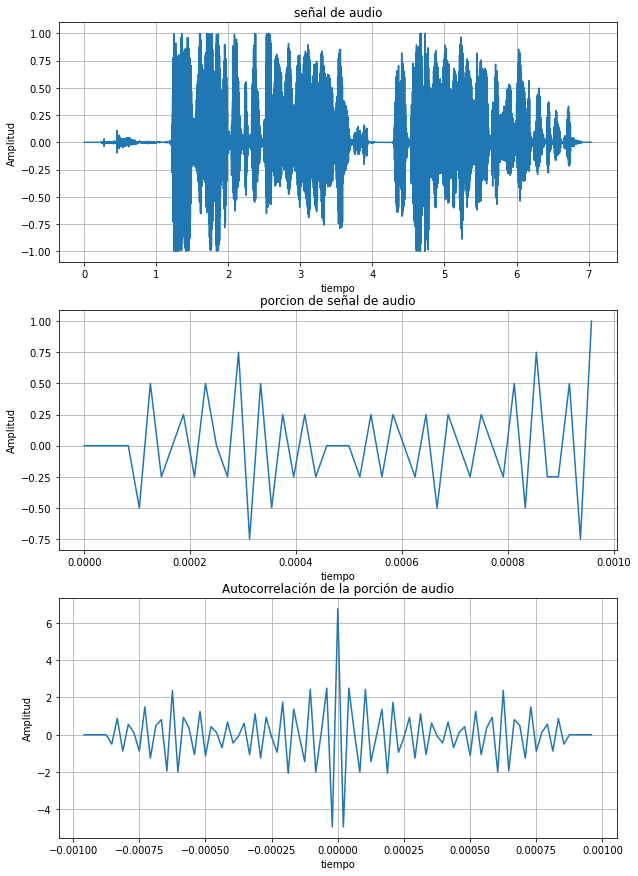

In [64]:
#vector de tiempos
t=np.arange(0,len(x)/fs,1.0/fs)
norm=x/max(x) #parte necesaria para lograr la igualdad con la imagen esperada.normalizando la absisa de amplitud.
plt.figure(figsize=(10,15)) #Modificaciónes del figuresize.
plt.subplot(3,1,1)
plt.plot(t,norm)
plt.title('señal de audio')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()
x2=[]
for i in range(len(t)):
  if(t[i]>0.000 and t[i]<0.001): #porcion de audio mudo
    x2.append(x[i])
t2=np.arange(0,len(x2)/fs,1/fs)
normx2=x2/abs(max(x2))
plt.subplot(3,1,2)
plt.plot(t2,normx2)
plt.title('porcion de señal de audio')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()
#Autocorrelación de la porción de audio.
x3=np.correlate(normx2,normx2, mode="full")
t3=np.arange(0,len(x3)/fs,1/fs)
tx3= np.mean(t3)-t3
plt.subplot(3,1,3)
plt.plot(tx3,x3)
plt.title('Autocorrelación de la porción de audio')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()

Al tomar un fragmento de audio "sordo", si bien no se reproduce la voz, se presenta ruido de fondo contaminante (ruido blanco). 
Se nota que al igual que como ocurre al correlacionar la señal consigo mismo, se presenta un pico centrado en cero, lo cual va a representar el nivel de potencia o energía, que en este caso es muy debil si se compara con el fragmento de audio, donde se presenta la voz.

---------------
                                     Parte 2: RADAR
--------------


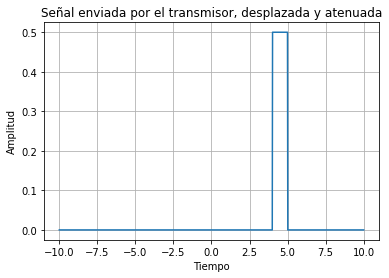

Ciclo de dureza: 5.0 %


In [ ]:

# Crear la señal
x = np.zeros(1000)
x[500:550] = 1
#desplazar
y=np.roll(x,200)
#atenuacion 
atenuacion=0.5*y
# Graficar la señal
plt.plot(np.linspace(-10, 10, 1000), atenuacion)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal enviada por el transmisor, desplazada y atenuada')
plt.grid()
plt.show()

ciclo_dureza = np.sum(x) / len(x)
print('Ciclo de dureza:', (ciclo_dureza*100),'%')

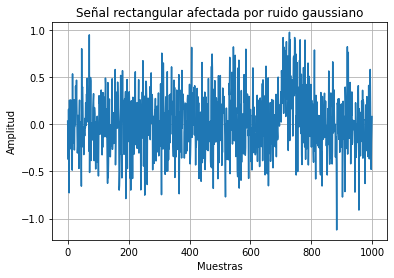

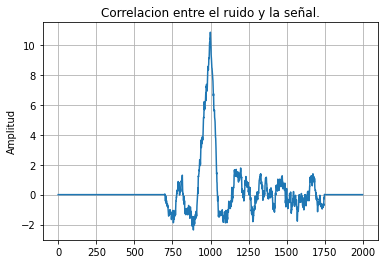

In [47]:
#generacion de señal de ruido gaussiano de media cero y desviacion 0,3
mean=0
deviation=0.3
noise=np.random.normal(mean,deviation,1000)
noise_signal= noise + atenuacion
plt.plot(noise_signal)
plt.title('Señal rectangular afectada por ruido gaussiano')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
#Correlacion ruido y señal 
correlation= np.correlate(atenuacion,noise_signal,mode='full')
plt.plot(correlation)
plt.title('Correlacion entre el ruido y la señal.')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

--------------------------------------------------------------------------------
                             Parte 3: Coeficientes y correlaciones
-------------------------------------------------------------------------------

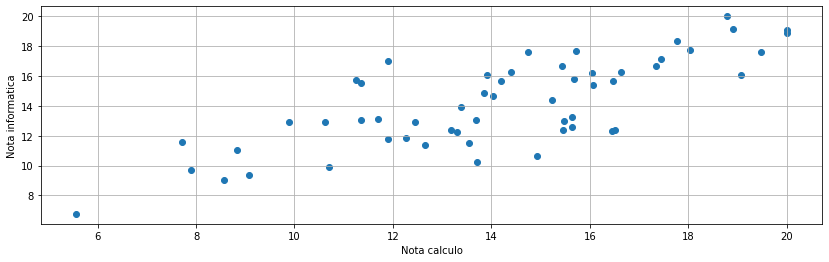

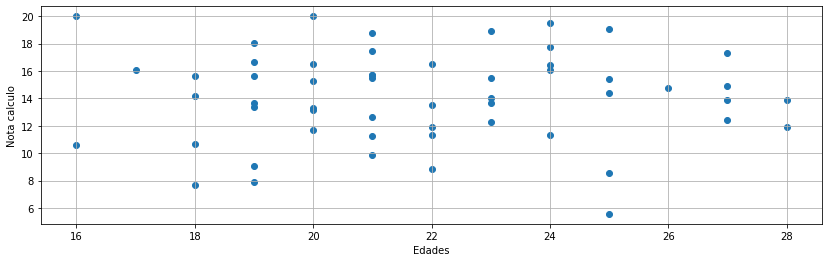

In [ ]:
df=pd.read_excel('DatosCorrelacion(1).xlsx')
edad=df['Edad']
notacal=df['Nota calculo']
notainfo=df['Nota informatica']

#conversión de los datos leidos del archivo, a lista de datos, para posterior manejo.
AgeVector=list(edad)
calculoVector= list(notacal)
infoVector=list(notainfo)

#Graficas 
plt.figure(figsize=(14,4))
plt.scatter(calculoVector,infoVector)
plt.xlabel('Nota calculo')
plt.ylabel('Nota informatica')
plt.grid()

plt.figure(figsize=(14,4))
plt.scatter(AgeVector,calculoVector)
plt.xlabel('Edades')
plt.ylabel('Nota calculo')
plt.grid()



In [ ]:
#Coeficiente de Correlacion de Pearson Entre las notas.
corr,p_value = stats.pearsonr(calculoVector,infoVector)
print('El coeficiente de correlacion Pearson  para las notas es: ', corr)
print('El valor de confiabilidad de la correlacion para las notas es: ', (p_value))
print('\n------------------------------------------------------------------------------------------------------')
#Coeficiente de Correalacion Spearman entre las notas. 
corr,p_value = stats.spearmanr(calculoVector,infoVector)
print('El coeficiente de correlacion Spearman  para las notas es: ', corr)
print('El valor de confiabilidad de la correlacion para las notas es: ', p_value)
print('\n------------------------------------------------------------------------------------------------------')
#Coeficiente de Correlacion Pearson Entre calculo y Edad.
corr,p_value = stats.pearsonr(AgeVector,calculoVector)
print('El coeficiente de correlacion Pearson entre la nota de calculo y la edad es: ', corr)
print('El valor de confiabilidad de la correlacion para las notas de calculo y la edad es: ', p_value)
print('\n------------------------------------------------------------------------------------------------------')
#Coeficiente de Correlacion Spearman entre calculo y notas. 
corr,p_value = stats.pearsonr(AgeVector,calculoVector)
print('El coeficiente de correlacion Spearman entre la nota de calculo y la edad es: ', corr)
print('El valor de confiabilidad de la correlacion para las notas de calculo y la edad es: ', p_value)
print('\n------------------------------------------------------------------------------------------------------')





El coeficiente de correlacion Pearson  para las notas es:  0.765171996669603
El valor de confiabilidad de la correlacion para las notas es:  1.0310873245946753e-11

------------------------------------------------------------------------------------------------------
El coeficiente de correlacion Spearman  para las notas es:  0.7179810957843831
El valor de confiabilidad de la correlacion para las notas es:  6.836934477471085e-10

------------------------------------------------------------------------------------------------------
El coeficiente de correlacion Pearson entre la nota de calculo y la edad es:  0.015621620319688799
El valor de confiabilidad de la correlacion para las notas de calculo y la edad es:  0.9098728864504275

------------------------------------------------------------------------------------------------------
El coeficiente de correlacion Spearman entre la nota de calculo y la edad es:  0.015621620319688799
El valor de confiabilidad de la correlacion para las not